# **Extracting Data from FRED (Federal Reserve St. Louis)**

In [1]:
from fredapi import Fred

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Initialize the API

api_key = '7555a6d51dfce1dbb631286fe1d4fa46'
fred = Fred(api_key=api_key)

# ICE BofA US High Yield Index Option-Adjusted Spread

In [ ]:
dataHY = fred.get_series('BAMLH0A0HYM2', start_date = '2000-01-01', end_date = '2024-11-01')
print(dataHY)

1996-12-31    3.13
1997-01-01     NaN
1997-01-02    3.06
1997-01-03    3.09
1997-01-06    3.10
              ... 
2024-12-17    2.75
2024-12-18    2.73
2024-12-19    2.91
2024-12-20    2.86
2024-12-23    2.85
Length: 7395, dtype: float64


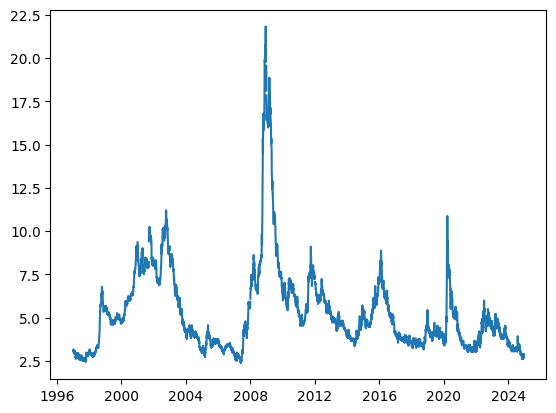

In [ ]:
plt.plot(dataHY, label = 'High Yield Spread', color = 'navy')

In [6]:
# Turn data into a dataframe

dataHY = dataHY.to_frame()
dataHY = dataHY.reset_index()
dataHY.columns = ['Date', 'High Yield Spread']
dataHY

,Date,High Yield Spread
0,1996-12-31,3.13
1,1997-01-01,NaN
2,1997-01-02,3.06
3,1997-01-03,3.09
4,1997-01-06,3.10
...,...,...
7390,2024-12-17,2.75
7391,2024-12-18,2.73
7392,2024-12-19,2.91
7393,2024-12-20,2.86


In [7]:
dataHY = dataHY[dataHY['Date'] >= '2000-09-18']
dataHY

,Date,High Yield Spread
981,2000-09-18,6.35
982,2000-09-19,6.41
983,2000-09-20,6.43
984,2000-09-21,6.45
985,2000-09-22,6.50
...,...,...
7390,2024-12-17,2.75
7391,2024-12-18,2.73
7392,2024-12-19,2.91
7393,2024-12-20,2.86


# Crude Oil West Texas Intermediate (WTI)

In [ ]:
dataWTI = fred.get_series('DCOILWTICO', start_date = '2000-01-01', end_date = '2024-11-01')
print(dataWTI)

1986-01-02    25.56
1986-01-03    26.00
1986-01-06    26.53
1986-01-07    25.85
1986-01-08    25.87
              ...  
2024-12-10    68.85
2024-12-11    70.57
2024-12-12    70.25
2024-12-13    71.54
2024-12-16    71.03
Length: 10163, dtype: float64


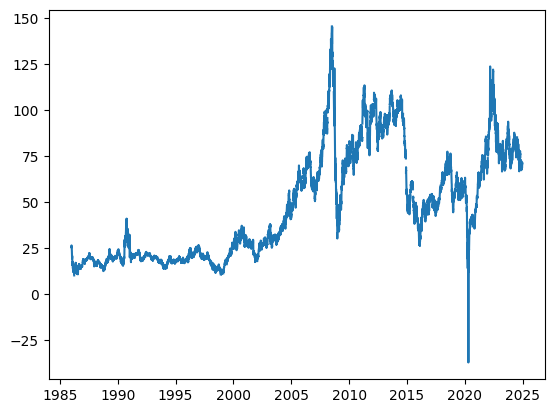

In [9]:
plt.plot(dataWTI, label='WTI Crude Oil Price', color = 'magenta')

In [10]:
# Turn data into a dataframe

dataWTI = dataWTI.to_frame()
dataWTI = dataWTI.reset_index()
dataWTI.columns = ['Date', 'WTI Oil Price']
dataWTI

,Date,WTI Oil Price
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
10158,2024-12-10,68.85
10159,2024-12-11,70.57
10160,2024-12-12,70.25
10161,2024-12-13,71.54


In [11]:
dataWTI = dataWTI[dataWTI['Date'] >= '2000-09-18']
dataWTI

,Date,WTI Oil Price
3837,2000-09-18,36.75
3838,2000-09-19,36.96
3839,2000-09-20,37.22
3840,2000-09-21,33.84
3841,2000-09-22,32.66
...,...,...
10158,2024-12-10,68.85
10159,2024-12-11,70.57
10160,2024-12-12,70.25
10161,2024-12-13,71.54


# US Treasury Securities at 10 Year (10 Yr Treasury Bond)

In [12]:
dataTB = fred.get_series('DGS10', start_date = '2000-01-01', end_date = '2024-11-01')
print(dataTB)

1962-01-02    4.06
1962-01-03    4.03
1962-01-04    3.99
1962-01-05    4.02
1962-01-08    4.03
              ... 
2024-12-16    4.39
2024-12-17    4.40
2024-12-18    4.50
2024-12-19    4.57
2024-12-20    4.52
Length: 16429, dtype: float64


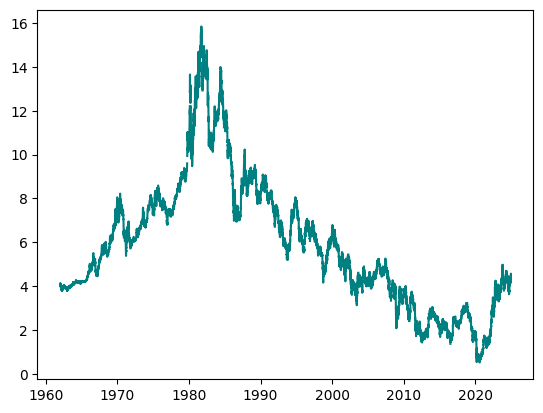

In [13]:
plt.plot(dataTB, label='10-Year Treasury Yield', color = 'teal')

In [14]:
dataTB = dataTB.to_frame()
dataTB = dataTB.reset_index()
dataTB.columns = ['Date', '10-Yr Yield']
dataTB

,Date,10-Yr Yield
0,1962-01-02,4.06
1,1962-01-03,4.03
2,1962-01-04,3.99
3,1962-01-05,4.02
4,1962-01-08,4.03
...,...,...
16424,2024-12-16,4.39
16425,2024-12-17,4.40
16426,2024-12-18,4.50
16427,2024-12-19,4.57


In [15]:
dataTB = dataTB[dataTB['Date'] >= '2000-09-18']
dataTB

,Date,10-Yr Yield
10099,2000-09-18,5.88
10100,2000-09-19,5.86
10101,2000-09-20,5.91
10102,2000-09-21,5.88
10103,2000-09-22,5.85
...,...,...
16424,2024-12-16,4.39
16425,2024-12-17,4.40
16426,2024-12-18,4.50
16427,2024-12-19,4.57


# Merge datasets

In [16]:
# Merge the dataframes

data2 = pd.merge(dataHY, dataWTI, on = 'Date', how = 'inner')
data_FRED = pd.merge(data2, dataTB, on = 'Date', how = 'inner')
data_FRED

,Date,High Yield Spread,WTI Oil Price,10-Yr Yield
0,2000-09-18,6.35,36.75,5.88
1,2000-09-19,6.41,36.96,5.86
2,2000-09-20,6.43,37.22,5.91
3,2000-09-21,6.45,33.84,5.88
4,2000-09-22,6.50,32.66,5.85
...,...,...,...,...
6321,2024-12-10,2.67,68.85,4.22
6322,2024-12-11,2.64,70.57,4.26
6323,2024-12-12,2.66,70.25,4.32
6324,2024-12-13,2.68,71.54,4.40
